<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.1 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. Use what you have learned so far. Be creative. List all your findings.

In [2]:
# Read CSV
house_csv = "../../data/Sacramento_transactions.csv"
df=pd.read_csv(house_csv)
df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [3]:
df.tail()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
980,9169 GARLINGTON CT,SACRAMENTO,95829,CA,4,3,2280,Residential,Thu May 15 00:00:00 EDT 2008,232425,38.457679,-121.359620
981,6932 RUSKUT WAY,SACRAMENTO,95823,CA,3,2,1477,Residential,Thu May 15 00:00:00 EDT 2008,234000,38.499893,-121.458890
982,7933 DAFFODIL WAY,CITRUS HEIGHTS,95610,CA,3,2,1216,Residential,Thu May 15 00:00:00 EDT 2008,235000,38.708824,-121.256803
983,8304 RED FOX WAY,ELK GROVE,95758,CA,4,2,1685,Residential,Thu May 15 00:00:00 EDT 2008,235301,38.417000,-121.397424
984,3882 YELLOWSTONE LN,EL DORADO HILLS,95762,CA,3,2,1362,Residential,Thu May 15 00:00:00 EDT 2008,235738,38.655245,-121.075915


Reordering columns to have our target variable on the far right

In [4]:
df_no_price = df.drop('price', axis=1)

# Concatenate the removed column 'price' to the right side
df = pd.concat([df_no_price, df['price']], axis=1)

df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,latitude,longitude,price
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,38.631913,-121.434879,59222
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,38.478902,-121.431028,68212
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,38.618305,-121.443839,68880
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,38.616835,-121.439146,69307
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,38.519470,-121.435768,81900


In [5]:
df = df.drop('street', axis=1)

In [6]:
df.shape

(985, 11)

In [7]:
df.dtypes

city          object
zip            int64
state         object
beds           int64
baths          int64
sq__ft         int64
type          object
sale_date     object
latitude     float64
longitude    float64
price          int64
dtype: object

In [8]:
df.isnull().sum()

city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
latitude     0
longitude    0
price        0
dtype: int64

In [9]:
df['city'].value_counts()

city
SACRAMENTO         439
ELK GROVE          114
LINCOLN             72
ROSEVILLE           48
CITRUS HEIGHTS      35
ANTELOPE            33
RANCHO CORDOVA      28
EL DORADO HILLS     23
GALT                21
NORTH HIGHLANDS     21
CARMICHAEL          20
FOLSOM              17
ROCKLIN             17
RIO LINDA           13
ORANGEVALE          11
PLACERVILLE         10
CAMERON PARK         9
FAIR OAKS            9
WILTON               5
AUBURN               5
GOLD RIVER           4
ELVERTA              4
WEST SACRAMENTO      3
RANCHO MURIETA       3
POLLOCK PINES        3
GRANITE BAY          3
LOOMIS               2
EL DORADO            2
MATHER               1
PENRYN               1
MEADOW VISTA         1
FORESTHILL           1
DIAMOND SPRINGS      1
SHINGLE SPRINGS      1
COOL                 1
WALNUT GROVE         1
GARDEN VALLEY        1
SLOUGHHOUSE          1
GREENWOOD            1
Name: count, dtype: int64

In [10]:
df['type'].value_counts()

type
Residential     917
Condo            54
Multi-Family     13
Unkown            1
Name: count, dtype: int64

## Visualising the data

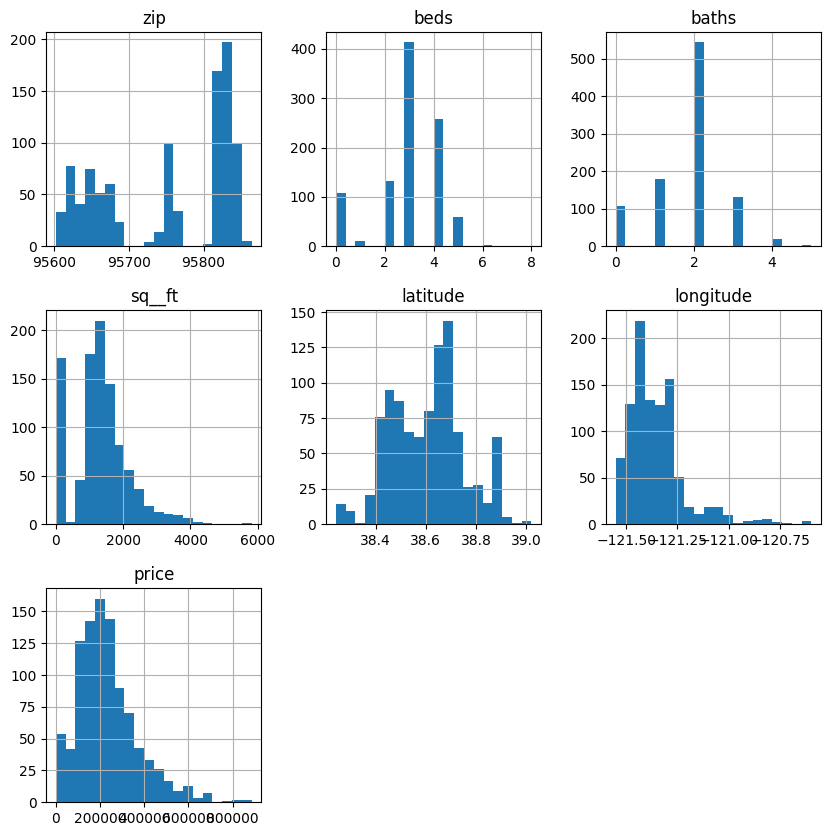

In [11]:
df.hist(bins=20,figsize=(10,10))
plt.show()

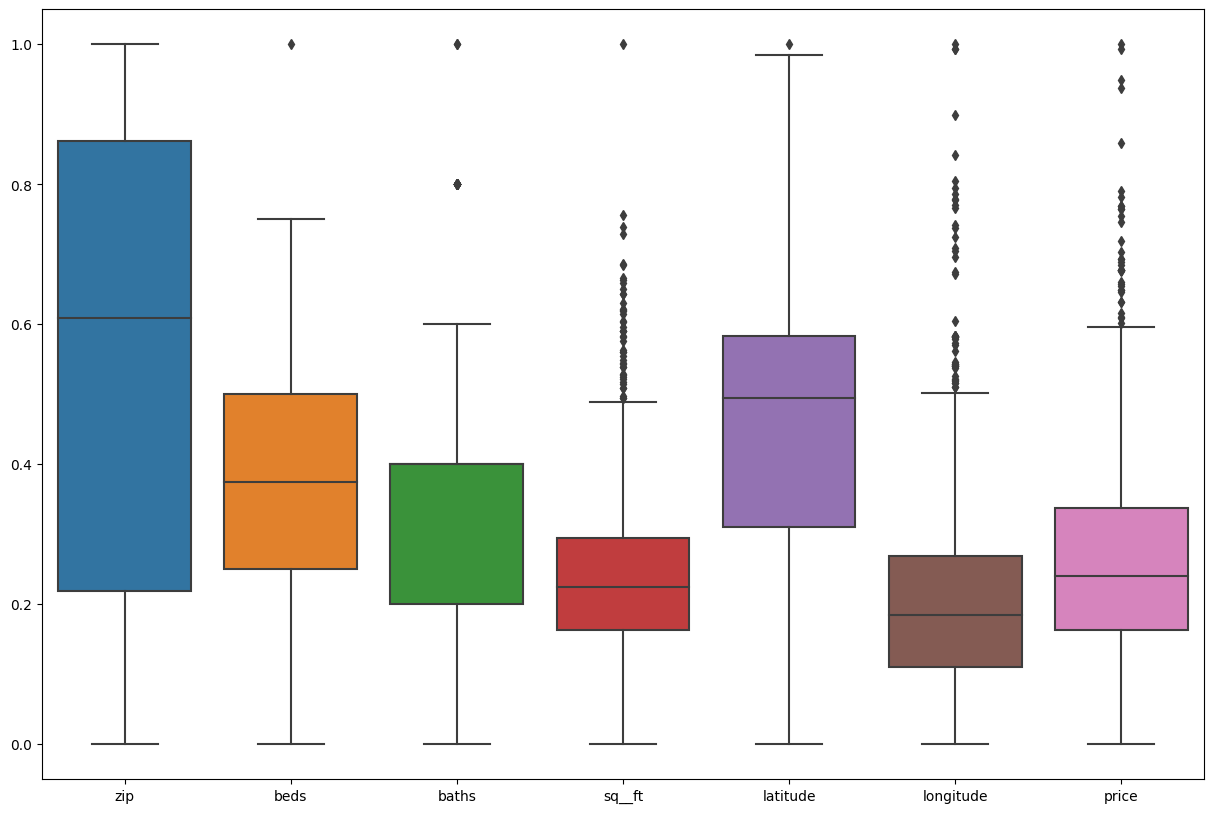

In [12]:
#isolating the numeric columns to then use a min/max scaler and visualising any outliers
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

scaler = MinMaxScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(df[numeric_cols]), columns=numeric_cols)

plt.figure(figsize=(15, 10))
sns.boxplot(data=df_scaled)
plt.show()

In [13]:
df.corr(numeric_only=True)

,zip,beds,baths,sq__ft,latitude,longitude,price
zip,1.000000,0.125319,0.069165,0.130108,-0.290389,-0.539904,-0.093353
beds,0.125319,1.000000,0.839650,0.684041,-0.291307,-0.053993,0.342024
baths,0.069165,0.839650,1.000000,0.665690,-0.235792,0.016582,0.416208
sq__ft,0.130108,0.684041,0.665690,1.000000,-0.383274,-0.177742,0.333897
latitude,-0.290389,-0.291307,-0.235792,-0.383274,1.000000,0.387925,-0.039573
longitude,-0.539904,-0.053993,0.016582,-0.177742,0.387925,1.000000,0.284485
price,-0.093353,0.342024,0.416208,0.333897,-0.039573,0.284485,1.000000


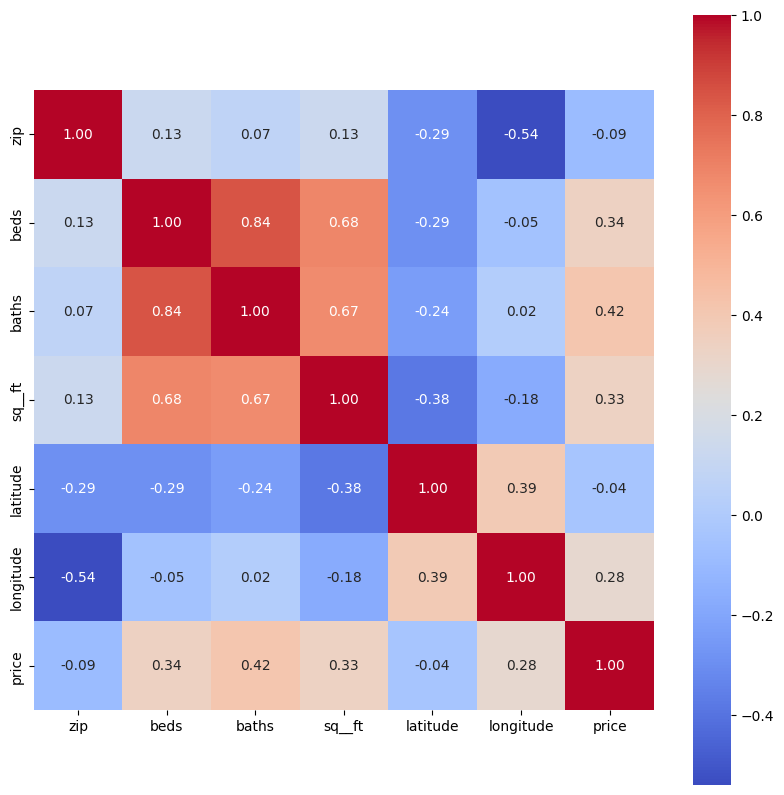

In [14]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.show()

In [15]:
def draw_scatter_plot(X, Y):
    fig = plt.figure(figsize=(15,7))
    ax = plt.gca()
    ax.scatter(X,Y)
    plt.show()

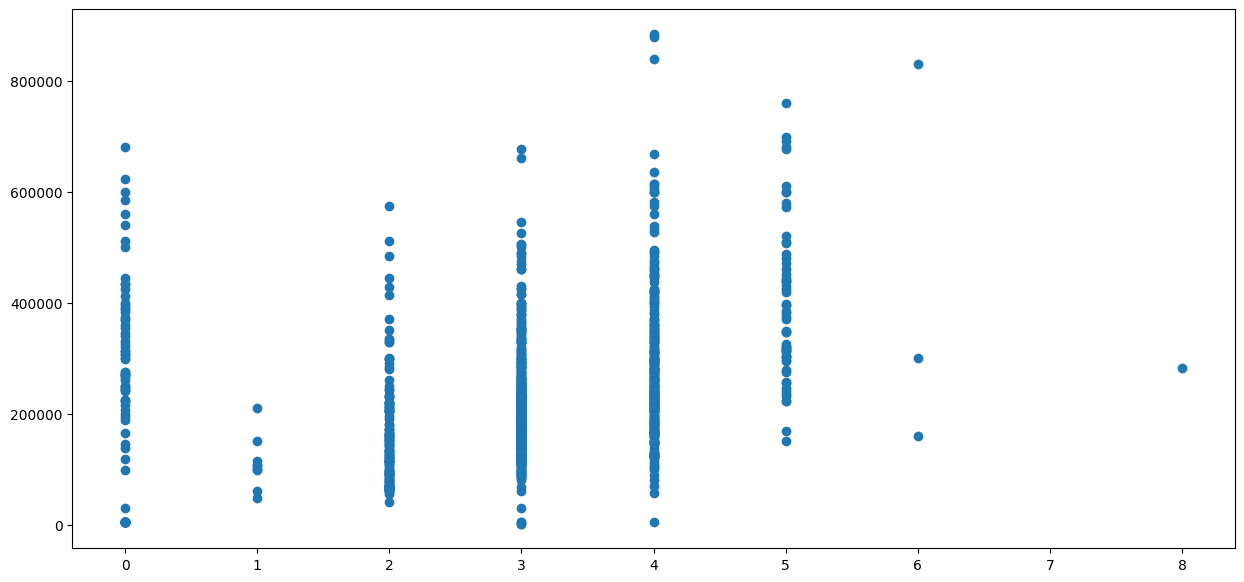

In [16]:
#Beds
draw_scatter_plot(df['beds'],df['price'])

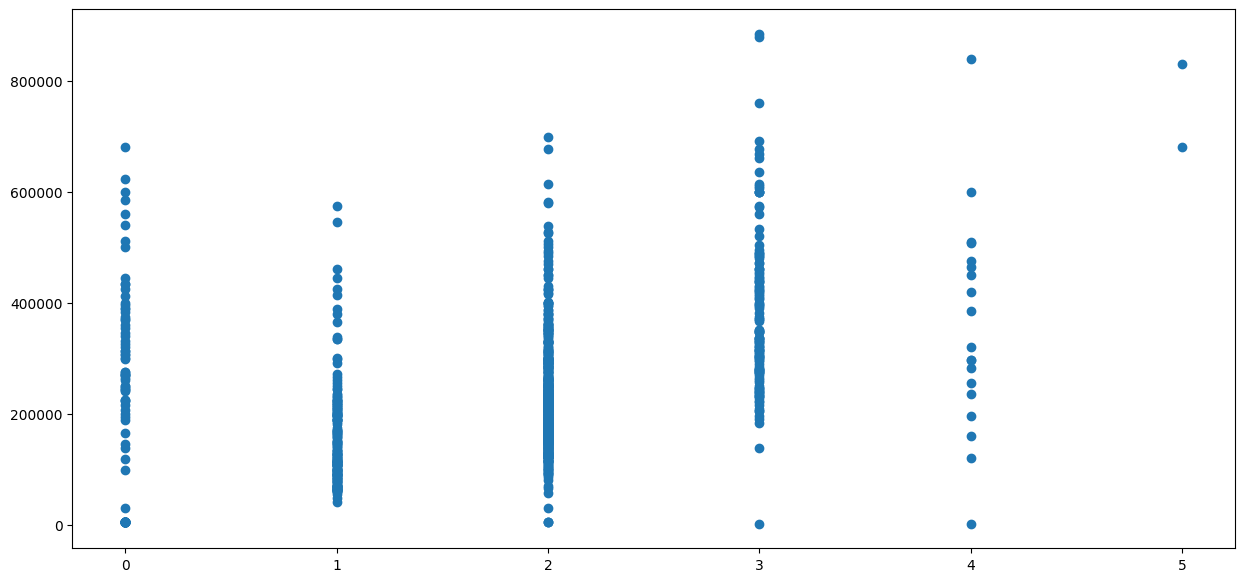

In [17]:
#Baths
draw_scatter_plot(df['baths'],df['price'])

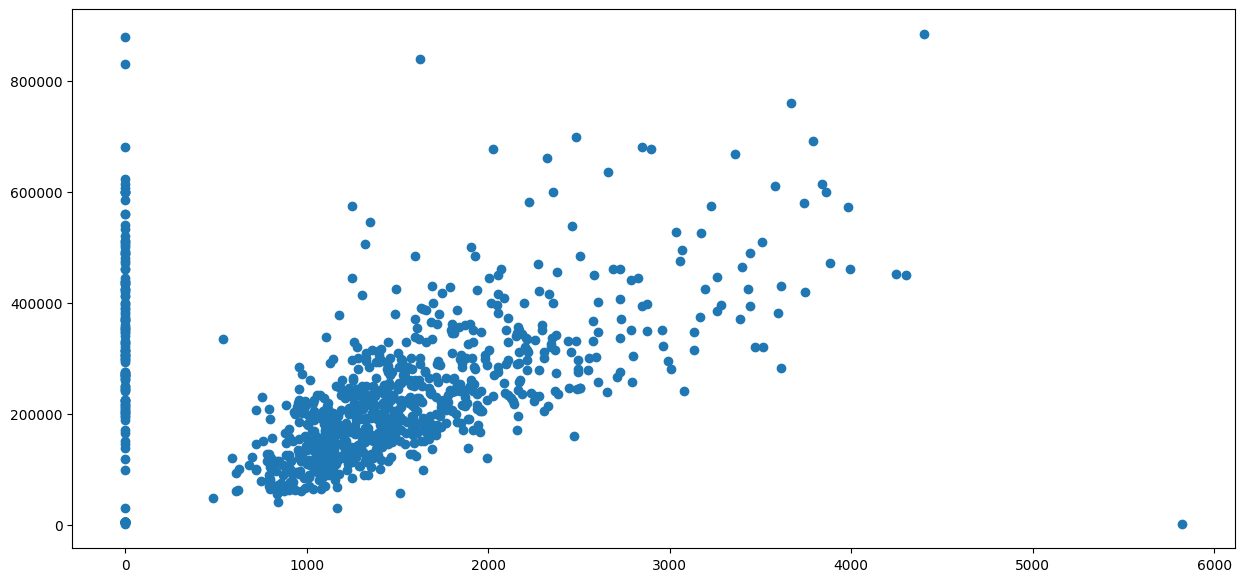

In [18]:
#Square footage
draw_scatter_plot(df['sq__ft'],df['price'])

For the sake of our model, I'm going to remove the rows where square footage = 0

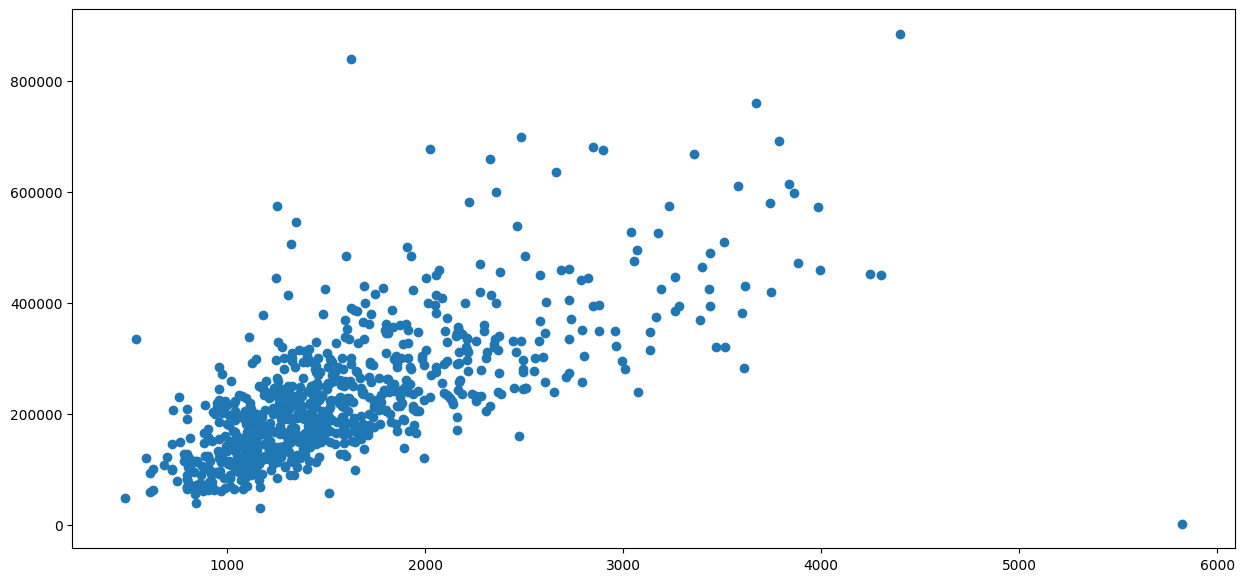

In [19]:
df_amended = df[df['sq__ft'] != 0]

draw_scatter_plot(df_amended['sq__ft'],df_amended['price'])

In [20]:
import folium
import pandas as pd

# Make an empty map using Mapbox tiles
# Replace 'your_mapbox_token' and 'your_map_style_url' with your Mapbox token and style URL
m = folium.Map(
    location=[38.575764, -121.478851],
    tiles="OpenStreetMap",  # Replace with your Mapbox style URL
    zoom_start=10
)

# I can add a circle/marker one by one on the map
for i in range(0, len(df.head(1000))):
    folium.Marker(
        location=[df.iloc[i]['latitude'], df.iloc[i]['longitude']]
    ).add_to(m)


display(m)

### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

In [21]:
# ANSWER
#Price is likely the target variable we want to predict


#### 2.2 List all possible variables which might be Predictor variable.

In [22]:
# ANSWER
#beds
#baths
#sq_ft

#### 2.3 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

In [23]:
# ANSWER
# Now that I have removed the rows where sq_ft = 0, the amended dataframe shows there is a strong correlation between sq_ft and price
df_amended.corr(numeric_only=True)

,zip,beds,baths,sq__ft,latitude,longitude,price
zip,1.000000,-0.072673,-0.103332,-0.101560,-0.134134,-0.562983,-0.219591
beds,-0.072673,1.000000,0.654746,0.695710,-0.107440,0.056713,0.441988
baths,-0.103332,0.654746,1.000000,0.724631,-0.081249,0.108081,0.501820
sq__ft,-0.101560,0.695710,0.724631,1.000000,-0.103287,0.135809,0.693708
latitude,-0.134134,-0.107440,-0.081249,-0.103287,1.000000,0.344431,0.058475
longitude,-0.562983,0.056713,0.108081,0.135809,0.344431,1.000000,0.278312
price,-0.219591,0.441988,0.501820,0.693708,0.058475,0.278312,1.000000


#### 2.4 What is the simplest way to predict price

So we have information for 985 houses. What is the easiest way to predict price of a house?

In [24]:
# ANSWER
#using the mean
df_amended.loc[:, 'y_hat'] = df_amended['price'].mean()



C:\Users\Louis\AppData\Local\Temp\ipykernel_6740\2369846264.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_amended.loc[:, 'y_hat'] = df_amended['price'].mean()


In [25]:
def draw_plot(X, Y, Yhat):
    fig = plt.figure(figsize=(15,7))
    ax = plt.gca()
    ax.scatter(X,Y)
    ax.plot(X, Yhat, c='red')
    plt.show()

#### 2.5 Find Residuals

Find difference between actual value and predicted value. Use absolute value.

In [26]:
# ANSWER
res = abs(df_amended['price'] - df_amended['y_hat']).mean()
res



88232.2039674251

#### 2.6  Predict Using Linear Regression

[Simple Linear Regression](https://en.wikipedia.org/wiki/Simple_linear_regression#Fitting_the_regression_line)

### $$\hat{y} = \beta_0 + \beta_1 x$$

> ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

and

> ### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

Given variables:
- $\bar{y}$ : the sample mean of observed values $Y$
- $\bar{x}$ : the sample mean of observed values $X$

##### 2.7 Define X, Y

- X = Predictor Variable
- Y = Target Variable

In [27]:
# ANSWER
X = df_amended['sq__ft']
y = df_amended['price']

##### 2.7.A Calculate beta_1

 ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

In [28]:
# ANSWER
def calculate_beta_1(X,Y):
    Xbar = X.mean()
    Ybar = Y.mean()

    n = np.sum((Y - Ybar) * (X - Xbar))
    d = np.sum(np.square(X - Xbar))
    beta_1 = n/d

    return beta_1

In [29]:
beta_1 = calculate_beta_1(X, y)
beta_1

125.21648667984462

##### 2.7.B Calculate beta_0

### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

In [30]:
# ANSWER
def calculate_beta_0(X,Y):
    Xbar = X.mean()
    Ybar = Y.mean()

    beta_0 = Ybar - calculate_beta_1(X, Y) * Xbar

    return beta_0


In [31]:
beta_0 = calculate_beta_0(X, y)
beta_0

30210.633866918943

##### 2.7.C Find Yhat (Predicted Value Using Beta 0 and Beta 1)

### $$\hat{y} = \beta_0 + \beta_1 x$$

In [32]:
# ANSWER
def calculate_yhat(X, b0, b1):
    return b0 + b1 * X

In [33]:
Yhat = calculate_yhat(X,beta_0, beta_1)
Yhat

0      134891.616731
1      176338.273822
2      129882.957264
3      136895.080518
4      130008.173751
           ...      
980    315704.223497
981    215155.384693
982    182473.881670
983    241200.413922
984    200755.488725
Name: sq__ft, Length: 814, dtype: float64

##### 2.7.D Find Residuals

### $$ \text{residual}_i = y_i - \hat{y}_i$$

In [34]:
# ANSWER
def calc_res(Y, Yhat):
    res = Y - Yhat
    return res

In [35]:
residuals = calc_res(y, Yhat)
abs(residuals)

0       75669.616731
1      108126.273822
2       61002.957264
3       67588.080518
4       48108.173751
           ...      
980     83279.223497
981     18844.615307
982     52526.118330
983      5899.413922
984     34982.511275
Length: 814, dtype: float64

##### 2.7.E Find R-Square

The coefficient $R^2$ is defined as $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$, where $$ SS_{res} $$ is the residual sum of squares $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$ and $$ SS_{res} $$ is the total sum of squares $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

**Write a function to calculate R- Square value.**

The total sum of squares:

### $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The residual sum of squares:

### $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$

$R^2$:

### $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$

In [36]:
# ANSWER
def calculate_total_sum_of_square(Y):
    Ybar = np.mean(Y)
    sum_square_total = np.square(Y - Ybar)
    sum_square_total = np.sum(sum_square_total)
    return sum_square_total



In [37]:
def calculate_residual_sum_squares(Y, Yhat):
    sum_square_res = np.square(Y - Yhat)
    sum_square_res = np.sum(sum_square_res)
    return sum_square_res

In [38]:
def calc_r_square(Y, Yhat):
    sum_square_total = calculate_total_sum_of_square(Y)
    sum_square_res = calculate_residual_sum_squares(Y, Yhat)
    R_square = 1 - (sum_square_res / sum_square_total)
    return R_square

In [39]:
calculate_total_sum_of_square(y)

11673191135321.695

In [40]:
calculate_residual_sum_squares(y, Yhat)

6055693038402.001

In [41]:
calc_r_square(y, np.mean(y))

0.0

In [42]:
calc_r_square(y, Yhat)

0.4812307133326901

##### 2.7.F [BONUS] Draw Plot of Predicted Line

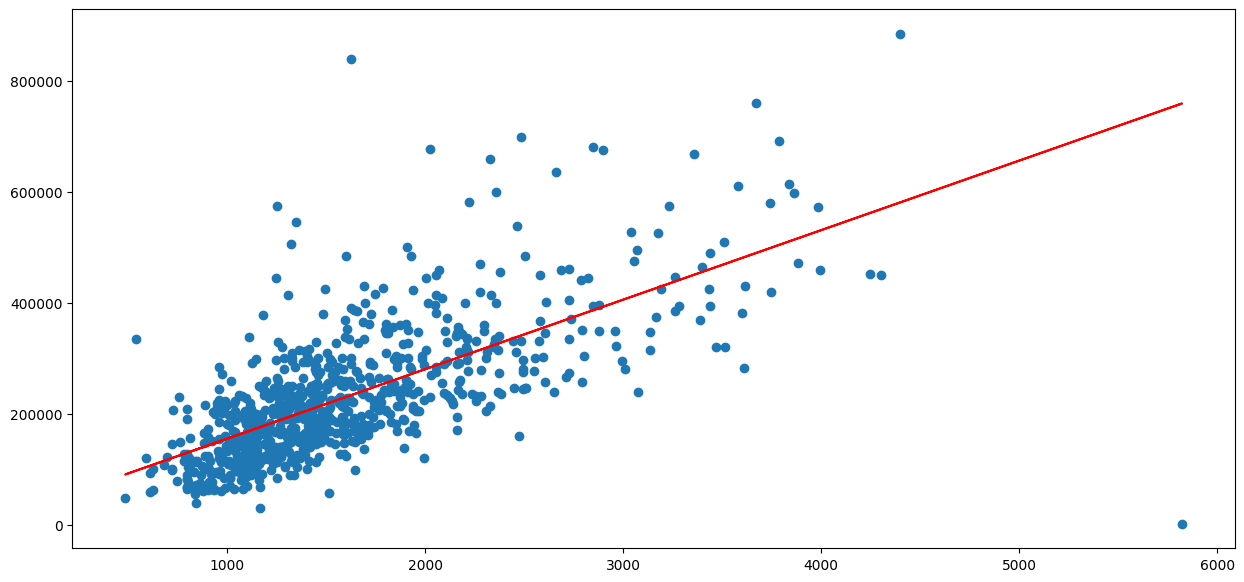

In [43]:
# ANSWER
draw_plot(X, y, Yhat)

##### 2.7.G [BONUS] Draw Plot of Predicted Line With Residuals

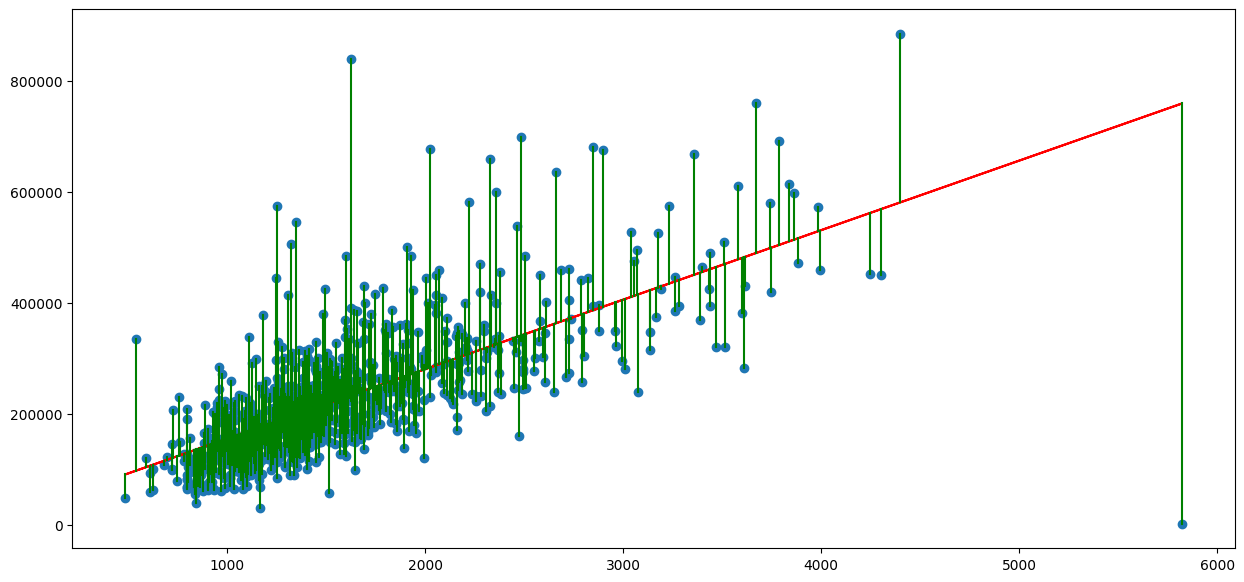

In [44]:
# ANSWER
df_amended.loc[:, 'y_hat'] = Yhat

fig = plt.figure(figsize=(15,7))
ax = plt.gca()
ax.scatter(X,y)
ax.plot(X, Yhat, c='red')

for _, row in df_amended.iterrows():
    plt.plot((row['sq__ft'],row['sq__ft']), (row['price'],row['y_hat']), 'g-' )

#plt.show()

### 3. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house.**

In [45]:
# ANSWER
x_pred = 1204

y_pred = beta_0 + beta_1 * x_pred
y_pred

180971.28382945186



---



---



> > > > > > > > > © 2023 Institute of Data


---



---



